In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from datetime import datetime
from matplotlib import pyplot as plt

## A) Import & Read Data

Data is downloaded from https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

In [2]:
credits_df = pd.read_csv('tmdb_5000_credits.csv')
movies_df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## B) Data Insights

### 1. How can you determine if a movie is successful? Based on this criteria, what are the top 10 movies?

- For this question I'd only be using movies_df
- To start off with I'll look at some possible metrics and then narrow down to a few ones that are meaningful to work with

In [7]:
import warnings
warnings.filterwarnings("ignore")

#getting only a subset of data that MIGHT be relevant to determining success
movies_subset_df = movies_df[['budget','revenue','popularity','vote_average','vote_count']]

#calculate ROI, which is (revenue-budget)/budget
#add $1 in denominator to avoid division by 0, and add $1 in numerator to avoid log(0) later
movies_subset_df['ROI'] = (movies_subset_df['revenue']+1)/(movies_subset_df['budget']+1)

#express budget & revenue in 100,000's
movies_subset_df[['budget','revenue']]=movies_subset_df[['budget','revenue']]/100000
round(movies_subset_df.describe(), 2)

,budget,revenue,popularity,vote_average,vote_count,ROI
count,4803.00,4803.00,4803.00,4803.00,4803.00,4.803000e+03
mean,290.45,822.61,21.49,6.09,690.22,7.515177e+05
std,407.22,1628.57,31.82,1.19,1234.59,8.578024e+06
min,0.00,0.00,0.00,0.00,0.00,0.000000e+00
25%,7.90,0.00,4.67,5.60,54.00,8.400000e-01
50%,150.00,191.70,12.92,6.20,235.00,1.250000e+00
75%,400.00,929.17,28.31,6.80,737.00,3.550000e+00
max,3800.00,27879.65,875.58,10.00,13752.00,2.536254e+08


- I'm looking at the summary stats to get a sense of the spread of the data. I see some really extreme max values here.
- I'm not sure what scale "popularity" is on, but the max is many times larger than the 75th percentile, which makes me wonder what basis it is measured on. In comparison, vote_average has a range between 1 to 10, suggesting clean data that's measured on a scale.

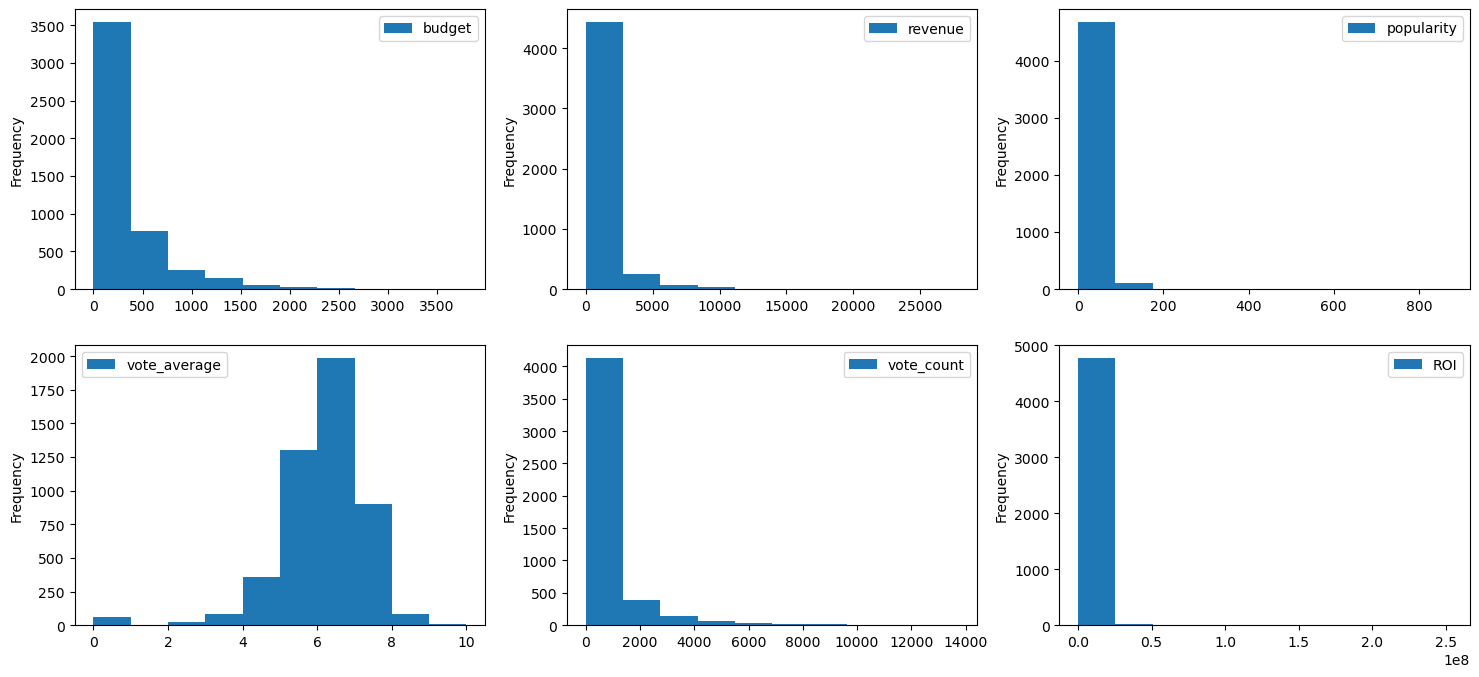

In [8]:
plt.figure(figsize=(18,8))
for n, col in enumerate(movies_subset_df.columns):
    ax = plt.subplot(2, 3, n+1)
    movies_subset_df[col].plot.hist(bins=10, ax=ax,legend=True)

- I plotted histograms to see the distribution of data
- All the metrics except for vote_average (which appears relatively normally distributed) are heavily skewed to the right with long tails
- revenue, vote_count and ROI are the most heavily skewed and might need a log or square-root transformation; I might drop popularity as I'm not sure what scale it's on or how it's measured

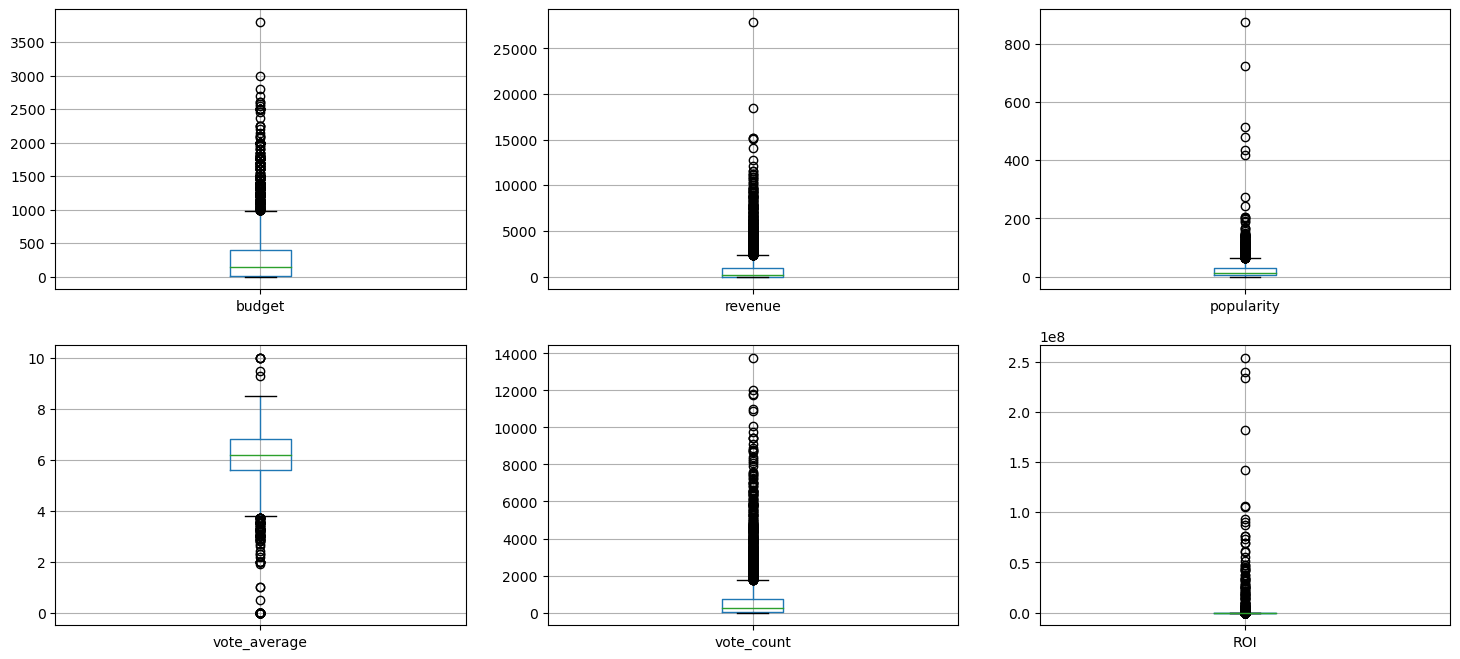

In [9]:
plt.figure(figsize=(18,8))
for n, col in enumerate(movies_subset_df.columns):
    ax = plt.subplot(2, 3, n+1)

    movies_subset_df.boxplot(column=col, ax=ax)

- Looking at the distribution another way via boxplots; again everything is super skewed except vote_average; ROI's range is mostly made up of outliers, so much so that you can't even see its lower and upper whiskers let alone the quartiles
- I will print out the skew values for more concrete comparison

In [10]:
movies_subset_df.skew().sort_values(ascending=False)

ROI             19.633001
popularity       9.721416
revenue          4.444716
vote_count       3.824069
budget           2.437211
vote_average    -1.959710
dtype: float64

In [11]:
movies_subset_df['ROI_log']=np.log(movies_subset_df['ROI'])
movies_subset_df['ROI_sqrt']=np.sqrt(movies_subset_df['ROI'])
for col in movies_subset_df.columns[-2:]:
    print(col, ":", round(movies_subset_df[col].skew(), 5))

ROI_log : -1.07904
ROI_sqrt : 10.24956


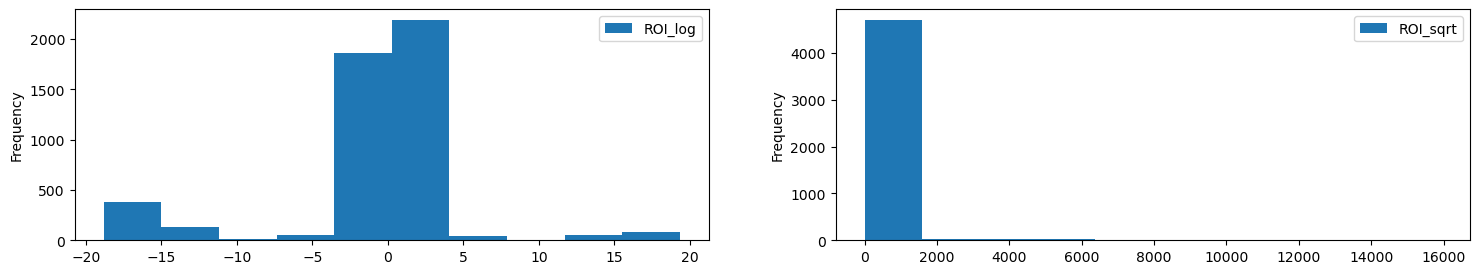

In [12]:
plt.figure(figsize=(18,3))
for n, col in enumerate(movies_subset_df.columns[-2:]):
    ax = plt.subplot(1, 2, n+1)
    movies_subset_df[col].plot.hist(bins=10, ax=ax,legend=True)

- I will go with log transformation for ROI as it really helped with the skew
- I'm dropping popularity as I think vote_average and vote_count make better indirect measures for popularity than the actual "popularity" metric
- I'm dropping budget, as ROI and revenue are better measures for success
- For the other less skewed attributes, I will use square root transformation for a gentler adjustment

In [13]:
movies_subset_df['revenue_sqrt']=np.sqrt(movies_subset_df['revenue'])
movies_subset_df['vote_count_sqrt']=np.sqrt(movies_subset_df['vote_count'])
for col in movies_subset_df.columns[-2:]:
    print(col, ":", movies_subset_df[col].skew())

revenue_sqrt : 1.4334773302647283
vote_count_sqrt : 1.5775774931129765


- When considering "success" I think it depends on what's most important to the stakeholder measuring it. 
- In business it might be vote_average/ratings/NPS scores and ROI, but in the movie industry, it might be different, and # of viewers might also matter, hence vote_count and revenue might be just as important as vote_average and ROI
- For now I would assume popularity-related and revenue-related metrics all matter equally, with vote_average and vote_count falling under the "popularity" category, and revenue and ROI falling under the "revenue/business" category

In [14]:
#I'm getting z-scores for better comparison
movies_metrics_df = movies_subset_df[['revenue_sqrt','ROI_log','vote_average','vote_count_sqrt']]
movies_metrics_df_z = movies_metrics_df.apply(zscore)

In [15]:
movies_metrics_df_z['success_score']= movies_metrics_df_z['revenue_sqrt']*0.25 \
                                      + movies_metrics_df_z['ROI_log']*0.25 \
                                      + movies_metrics_df_z['vote_average']*0.25 \
                                      + movies_metrics_df_z['vote_count_sqrt']*0.25

In [16]:
movies_names_df = movies_df['original_title']
movies_metrics_df_z = pd.merge(movies_metrics_df_z, movies_names_df, left_index=True, right_index=True)
movies_metrics_df_z

,revenue_sqrt,ROI_log,vote_average,vote_count_sqrt,success_score,original_title
0,6.940276,0.543164,0.927451,5.181871,3.398190,Avatar
1,3.701947,0.325499,0.676297,2.754680,1.864606,Pirates of the Caribbean: At World's End
2,3.505305,0.344781,0.173990,2.739847,1.690981,Spectre
3,3.989877,0.376304,1.262322,4.410556,2.509765,The Dark Knight Rises
4,1.601072,0.145550,0.006554,1.528099,0.820319,John Carter
...,...,...,...,...,...,...
4798,-0.690563,0.503426,0.425143,-0.263101,-0.006274,El Mariachi
4799,-0.902768,-1.392860,-0.160882,-1.033757,-0.872567,Newlyweds
4800,-0.902768,0.130694,0.760015,-1.021289,-0.258337,"Signed, Sealed, Delivered"
4801,-0.902768,0.130694,-0.328318,-1.009823,-0.527553,Shanghai Calling


- Here are the top 10 movies based on our success definition. The findings are quite in-line with our general knowledge of movies.

In [17]:
top_movies_df=movies_metrics_df_z[['original_title','success_score']].sort_values(by='success_score', ascending=False)
top_movies_df.rename(columns={"original_title":"title"}, inplace=True)
top_movies_df.head(10)

,title,success_score
0,Avatar,3.398190
16,The Avengers,2.902970
65,The Dark Knight,2.804886
96,Inception,2.784486
25,Titanic,2.768659
329,The Lord of the Rings: The Return of the King,2.593446
3,The Dark Knight Rises,2.509765
28,Jurassic World,2.501968
95,Interstellar,2.482478
788,Deadpool,2.469166


<Axes: title={'center': 'Distribution of Movie Success Score'}, ylabel='Frequency'>

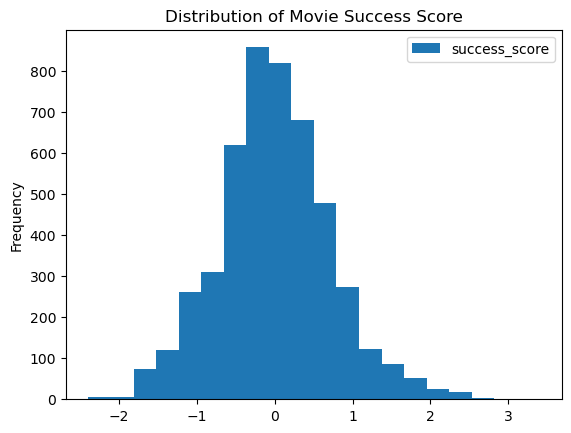

In [18]:
top_movies_df.plot.hist(bins=20, title='Distribution of Movie Success Score') #see if the distribution is normal

- Our success scores follow a normal distribution, which is good

### 2. Focusing on just the top 3 credited actors and actresses for each movie, which ones are in multiple movies? Is there a KPI you can create to determine the general success/popularity of these actors and actresses?

In [19]:
pd.read_json(credits_df.cast[0])

,cast_id,character,credit_id,gender,id,name,order
0,242,Jake Sully,5602a8a7c3a3685532001c9a,2,65731,Sam Worthington,0
1,3,Neytiri,52fe48009251416c750ac9cb,1,8691,Zoe Saldana,1
2,25,Dr. Grace Augustine,52fe48009251416c750aca39,1,10205,Sigourney Weaver,2
3,4,Col. Quaritch,52fe48009251416c750ac9cf,2,32747,Stephen Lang,3
4,5,Trudy Chacon,52fe48009251416c750ac9d3,1,17647,Michelle Rodriguez,4
...,...,...,...,...,...,...,...
78,98,Female Marine (uncredited),52fe48019251416c750acb5f,0,1207291,Jodie Taylor,78
79,99,Ikran Clan Leader (uncredited),52fe48019251416c750acb63,1,1186027,Alicia Vela-Bailey,79
80,100,Geologist (uncredited),52fe48019251416c750acb67,0,1207292,Richard Whiteside,80
81,101,Na'vi (uncredited),52fe48019251416c750acb6b,0,103259,Nikie Zambo,81


In [20]:
pd.read_json(credits_df.cast[0])['name'][:3].to_list()

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']

In [21]:
#get the number of json dictionary key values in each row, so we can discard rows with no cast dictionary
credits_df['json_cols']=credits_df['cast'].apply(lambda x: len(pd.read_json(x).columns.to_list()))
credits_df.head()

,movie_id,title,cast,crew,json_cols
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",7
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",7
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",7


In [22]:
credits_df.json_cols.value_counts() 

7    4760
0      43
Name: json_cols, dtype: int64

- 43 of the movies don't have cast data (0 dictionary keys), so I'll drop these rows

In [23]:
credits_df=credits_df[credits_df['json_cols']==7] #remove columns that don't have cast data

In [24]:
import warnings
warnings.filterwarnings("ignore")

#get top 3 actors casted in each movie
credits_df['top_3_cast']=credits_df['cast'].apply(lambda x: pd.read_json(x)['name'][:3].to_list())
credits_df

,movie_id,title,cast,crew,json_cols,top_3_cast
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]"
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",7,"[Johnny Depp, Orlando Bloom, Keira Knightley]"
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",7,"[Daniel Craig, Christoph Waltz, Léa Seydoux]"
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7,"[Christian Bale, Michael Caine, Gary Oldman]"
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",7,"[Taylor Kitsch, Lynn Collins, Samantha Morton]"
...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",7,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",7,"[Edward Burns, Kerry Bishé, Marsha Dietlein]"
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",7,"[Eric Mabius, Kristin Booth, Crystal Lowe]"
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",7,"[Daniel Henney, Eliza Coupe, Bill Paxton]"


In [25]:
top3cast_df=pd.DataFrame(credits_df[['title','top_3_cast']].explode('top_3_cast')).rename(columns={'top_3_cast':"actor"})
top3cast_df

,title,actor
0,Avatar,Sam Worthington
0,Avatar,Zoe Saldana
0,Avatar,Sigourney Weaver
1,Pirates of the Caribbean: At World's End,Johnny Depp
1,Pirates of the Caribbean: At World's End,Orlando Bloom
...,...,...
4801,Shanghai Calling,Eliza Coupe
4801,Shanghai Calling,Bill Paxton
4802,My Date with Drew,Drew Barrymore
4802,My Date with Drew,Brian Herzlinger


- Here's the list of actors and actresses and how many movies they have been in; the top 5 most active actors appear to be Robert De Niro, Matt Damon, Bruce Willis, Samuel L. Jackson and Nicolas Cage

In [26]:
top3cast_df['actor'].value_counts()

Robert De Niro        46
Matt Damon            35
Bruce Willis          35
Samuel L. Jackson     35
Nicolas Cage          34
                      ..
Mykelti Williamson     1
Eddie Albert           1
Paul Anka              1
Arletty                1
Brian Herzlinger       1
Name: actor, Length: 5687, dtype: int64

 - To determine an actor/actress's overall success, I will take into account the total success score of the movies they had been in

In [27]:
actor_movies_df = pd.merge(top3cast_df, top_movies_df, on='title')
actor_movies_df

,title,actor,success_score
0,Avatar,Sam Worthington,3.398190
1,Avatar,Zoe Saldana,3.398190
2,Avatar,Sigourney Weaver,3.398190
3,Pirates of the Caribbean: At World's End,Johnny Depp,1.864606
4,Pirates of the Caribbean: At World's End,Orlando Bloom,1.864606
...,...,...,...
13481,Shanghai Calling,Eliza Coupe,-0.527553
13482,Shanghai Calling,Bill Paxton,-0.527553
13483,My Date with Drew,Drew Barrymore,-0.382197
13484,My Date with Drew,Brian Herzlinger,-0.382197


In [28]:
actor_success_df = actor_movies_df.groupby('actor').sum()
actor_success_df

,success_score
actor,
"""Weird Al"" Yankovic",-0.864377
50 Cent,0.102350
A.J. Buckley,-0.656135
A.J. Cook,0.348078
A.J. DeLucia,-1.512786
...,...
Zubaida Sahar,-0.807129
Zuleikha Robinson,0.251054
Àlex Brendemühl,-0.871951


 - Funny to see "Weird Al" Yankovic	on the list
 - Let's sort the values in descending order

In [29]:
actor_success_df.sort_values(by='success_score', ascending=False).head(10)

,success_score
actor,
Tom Hanks,27.753896
Tom Cruise,23.564285
Brad Pitt,23.175288
Johnny Depp,22.954859
Leonardo DiCaprio,22.919861
Will Smith,20.856873
Matt Damon,18.997726
Ian McKellen,18.913555
Robert Downey Jr.,18.897405


- Actors who were in the most movies weren't necessarily in the most successful movies, hence the top 5 actors by success scores differ from the top 5 actors by # of movies they were in

### 3. How have movie runtimes fluctuated over the years? Do any factors contribute to this?

<Axes: title={'center': 'Time Series of Movie Runtimes (Daily)'}, xlabel='release_date'>

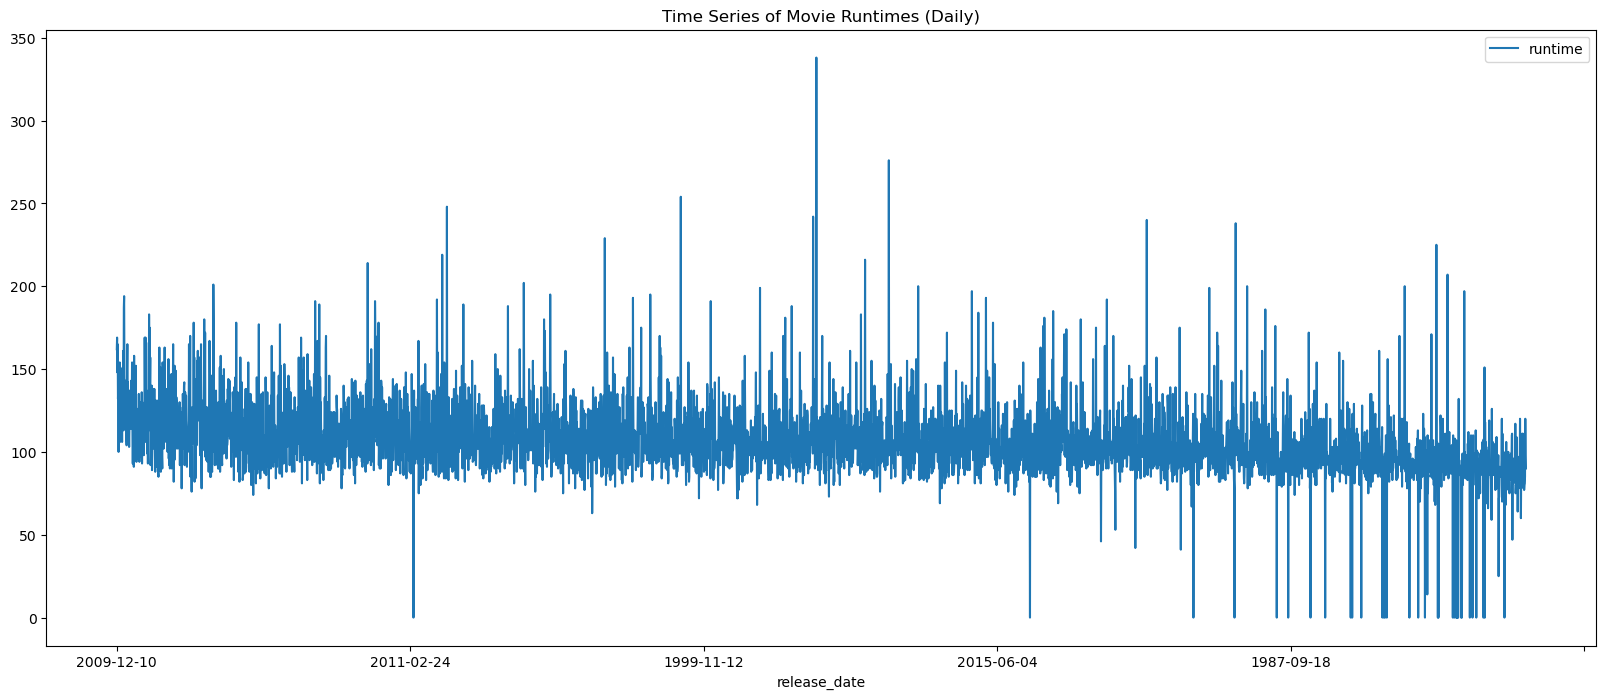

In [30]:
plt.rc('figure',figsize=(20,8))
runtime_df=movies_df[['release_date','runtime']]
runtime_df.plot.line('release_date','runtime', title='Time Series of Movie Runtimes (Daily)')

 - There is a general declining trend for runtimes, however, the day-granularity is not very helpful for seeing seasonality, so I'm going to aggregate to monthly level

In [31]:
runtime_df['release_date']=pd.to_datetime(runtime_df["release_date"], format="%Y-%m-%d")
runtime_df['release_month']=runtime_df['release_date'].dt.to_period('M').dt.to_timestamp()
runtime_df.head()

,release_date,runtime,release_month
0,2009-12-10,162.0,2009-12-01
1,2007-05-19,169.0,2007-05-01
2,2015-10-26,148.0,2015-10-01
3,2012-07-16,165.0,2012-07-01
4,2012-03-07,132.0,2012-03-01


In [32]:
runtime_agg_df=runtime_df[['release_month','runtime']].groupby('release_month').mean().reset_index()
runtime_agg_df.rename(columns={'runtime':'runtime_mean'}, inplace=True)
runtime_agg_df.head()

,release_month,runtime_mean
0,1916-09-01,197.0
1,1925-11-01,151.0
2,1927-01-01,153.0
3,1929-01-01,109.0
4,1929-02-01,100.0


<Axes: title={'center': 'Time Series of Movie Runtimes (Monthly)'}, xlabel='release_month'>

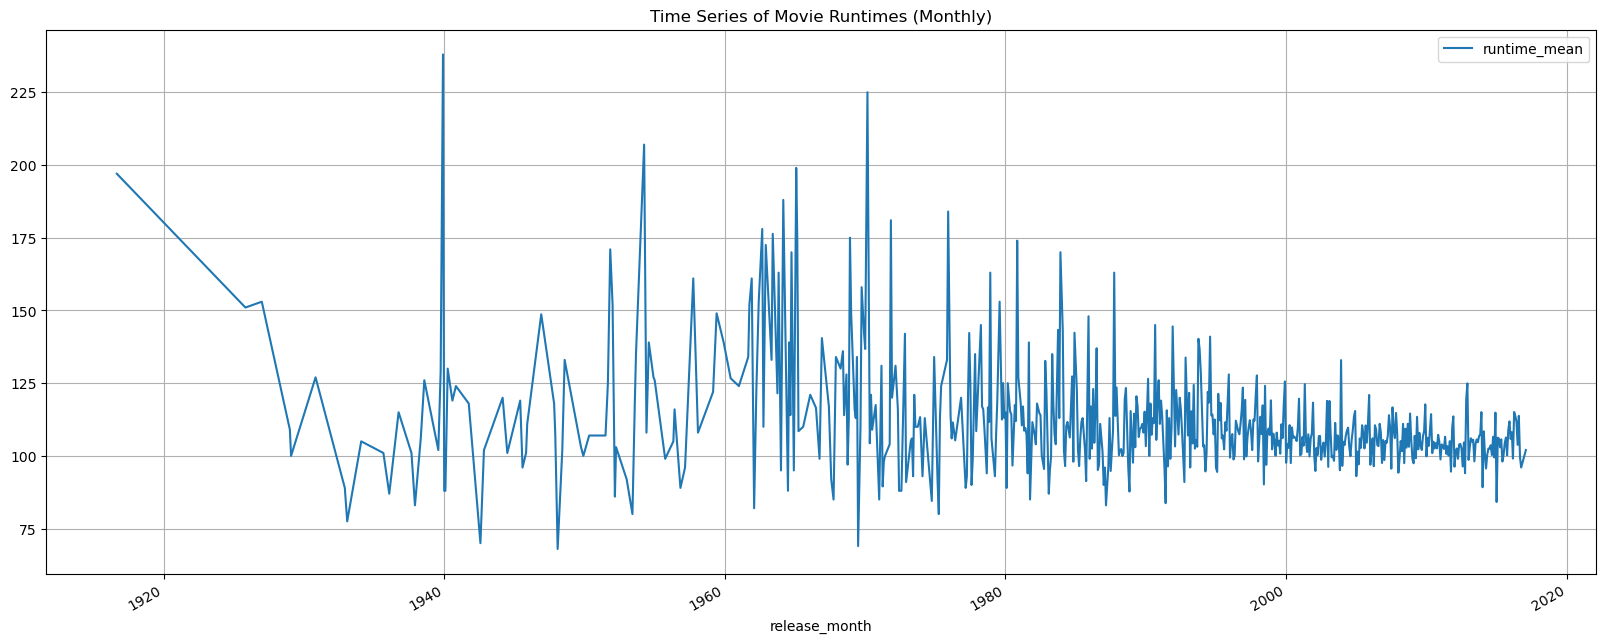

In [33]:
plt.rc('figure',figsize=(20,8))
runtime_agg_df.plot.line('release_month','runtime_mean', grid=True, title='Time Series of Movie Runtimes (Monthly)')

- The year spaces in the x-axis are not even, but that's because the density of data points are sparse prior to 1960's
- We can see smaller variance of movie runtimes starting around 2000, where movie runtimes become rather consistent, falling within the 100 to 125 range. 

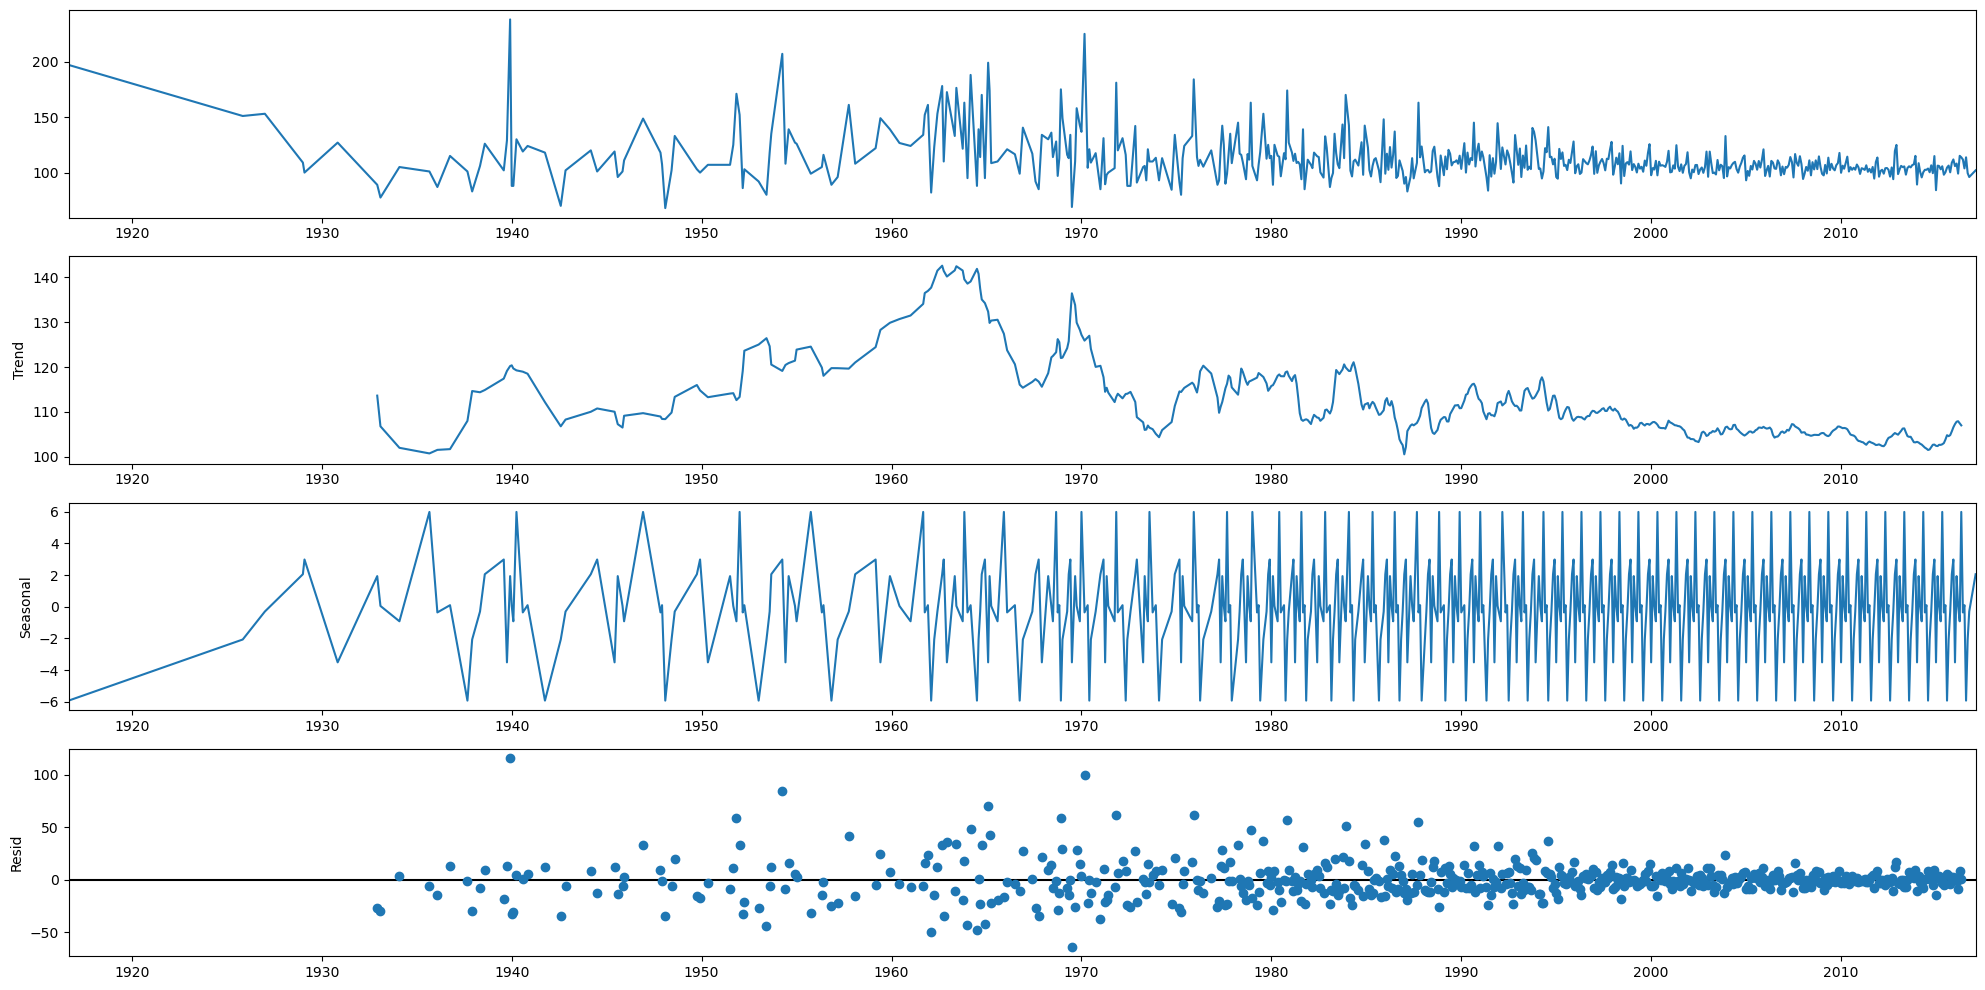

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
plt.rc('figure',figsize=(20,10))

runtime_agg_df=runtime_agg_df.sort_values(by='release_month')

result = sd(runtime_agg_df.set_index('release_month'), period=12) 
result.plot()
plt.show()

- I chose monthly seasonality breakdown, because certain months like Valentine's month, Halloween month, Christmas month probably have spikes in movie releases (spoiler alert, I look into this at the end of this notebook!)
- There's too much gaps in the data from 1980's and prior for the seasonality breakdown to properly work, so I will filter out the early dates

<Axes: title={'center': 'Closer Look at 1980 Onwards (Monthly)'}, xlabel='release_month'>

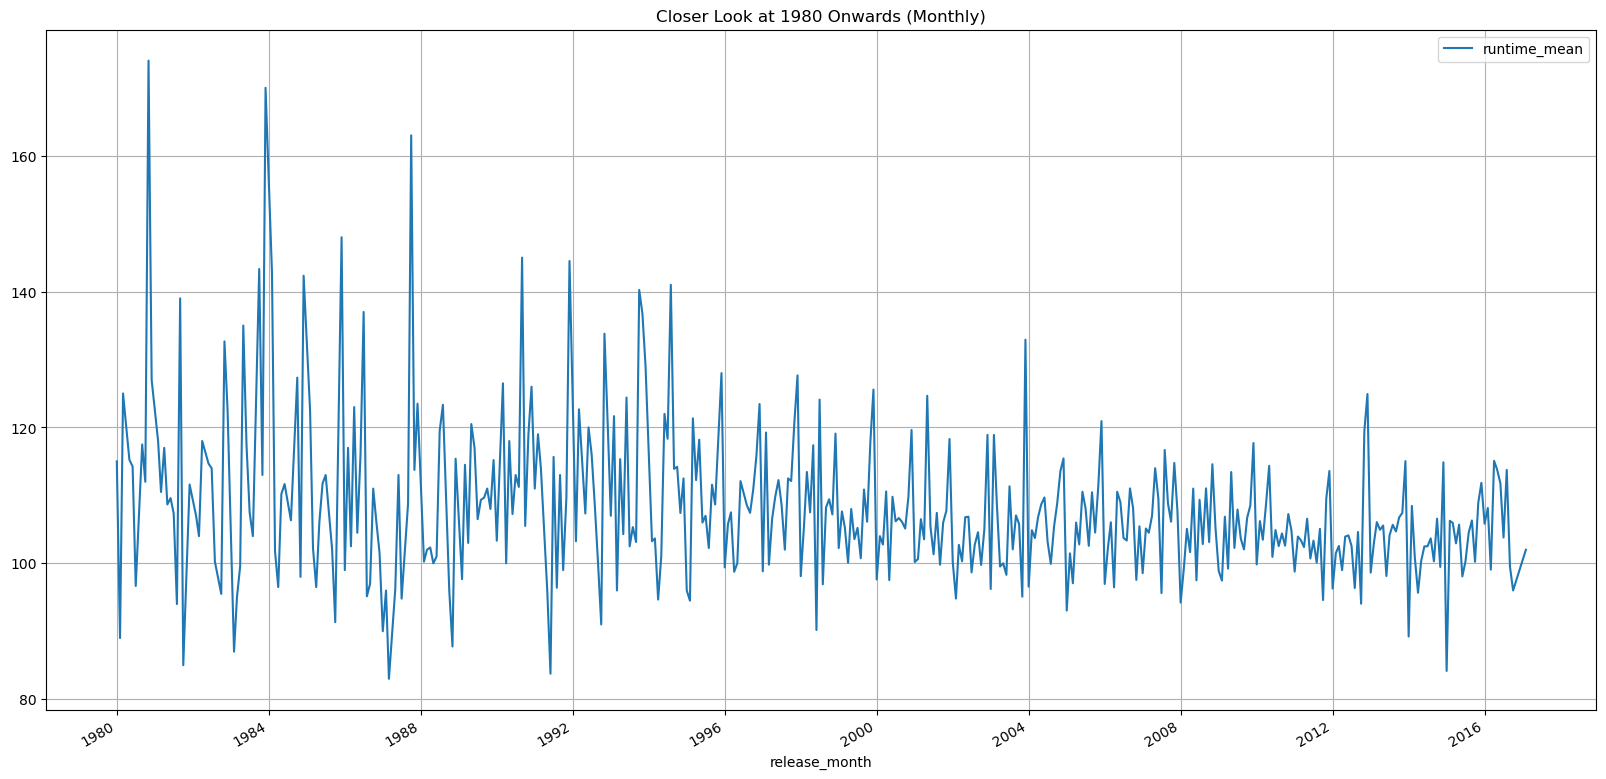

In [35]:
runtime_agg_df.set_index('release_month')['1980-01-01':].reset_index().plot.line('release_month','runtime_mean'
                                                                                 , title='Closer Look at 1980 Onwards (Monthly)'
                                                                                 , grid=True)

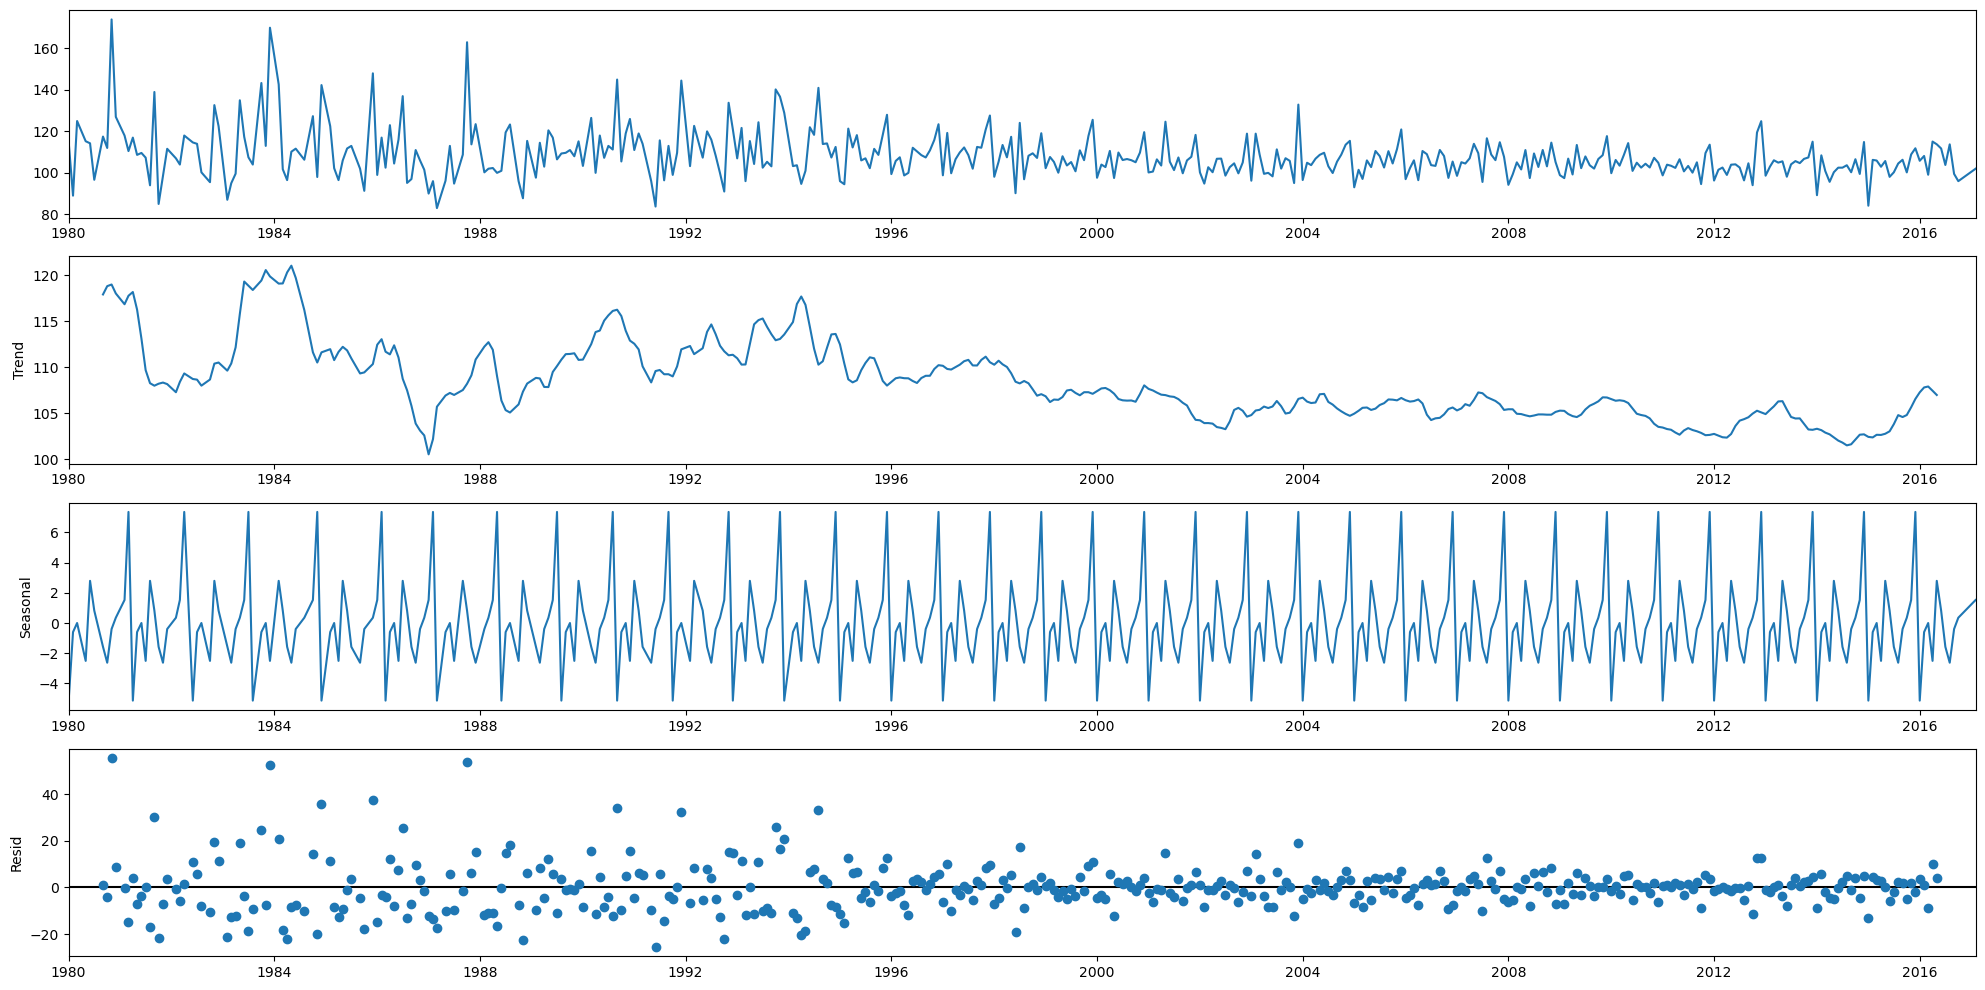

In [36]:
result = sd(runtime_agg_df.set_index('release_month')['1980-01-01':], period=12)
result.plot()
plt.show()

- Due to sparse data points prior to 1980s, I filtered out data from before 1980's to take a closer look at the trend. Now the x-axis years are evenly spaced.
- Similar observations as prior, starting in the 2000s, influctuations in runtimes went down to the 100-120 range

#### Possible explanations for decline in variance and runtime averages
- Movie industry runtime standards being put in place means the variance went down; in particular, there's a distinction between feature-length films (SAG standards are >60mins) versus short/non-features that might not have existed before
- Technology advances, proliferation of movies and a change in times means people's attention spans are shorter and longer films are harder to sell to audiences

### 4. Are there any other trends or insights that you find interesting?

#### Correlations between revenue, vote_average and vote_count

- Do higher ratings correlate with higher revenue, and does higher vote_count correlate with higher revenue?
- Do higher ratings correspond to higher vote_counts? (i.e. do well-liked movies get voted on more?)

In [37]:
movies_df[['revenue','vote_average','vote_count']].corr()

,revenue,vote_average,vote_count
revenue,1.000000,0.197150,0.781487
vote_average,0.197150,1.000000,0.312997
vote_count,0.781487,0.312997,1.000000


- There seems to be no correlation between ratings and revenue, and surprisingly, also low correlation between vote_average and vote_count
- NOT surprisingly, higher vote_count correlates with higher revenue, which makes sense, as higher vote counts means more people watched the movie, which leads to more revenue

#### Movie genre insights

In [38]:
pd.read_json(movies_df.genres[0])

,id,name
0,28,Action
1,12,Adventure
2,14,Fantasy
3,878,Science Fiction


In [39]:
pd.read_json(movies_df.genres[0])['name'].to_list()

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [40]:
movies_df['json_ct'] = movies_df['genres'].apply(lambda x: len(pd.read_json(x).columns))
movies_df.json_ct.value_counts()

2    4775
0      28
Name: json_ct, dtype: int64

- 28 of these movies have no genre data and they will be dropped

In [41]:
movies_df=movies_df[movies_df['json_ct']==2]

In [42]:
movies_df['genre_list'] = movies_df['genres'].apply(lambda x: pd.read_json(x)['name'].to_list())

In [43]:
genres_date_df = movies_df[['release_date','genre_list']].explode('genre_list')
genres_date_df

,release_date,genre_list
0,2009-12-10,Action
0,2009-12-10,Adventure
0,2009-12-10,Fantasy
0,2009-12-10,Science Fiction
1,2007-05-19,Adventure
...,...,...
4800,2013-10-13,Comedy
4800,2013-10-13,Drama
4800,2013-10-13,Romance
4800,2013-10-13,TV Movie


In [44]:
genres_date_df.genre_list.value_counts()

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: genre_list, dtype: int64

- The top movie genre is Drama, followed by Comedy and Thriller
- Now I'm going to aggregate the genre counts by month

In [45]:
genres_date_df['release_date']=pd.to_datetime(genres_date_df["release_date"], format="%Y-%m-%d")
genres_date_df['release_month']=genres_date_df['release_date']+pd.offsets.MonthBegin(-1)

genre_overtime_df = pd.DataFrame(genres_date_df.groupby(['release_month','genre_list'])['genre_list']\
                                 .count()).rename(columns={'genre_list':'count'}).reset_index()\
                                 .rename(columns={'genre_list':'genre'})

genre_overtime_df

,release_month,genre,count
0,1916-09-01,Drama,1
1,1925-11-01,Drama,1
2,1925-11-01,Romance,1
3,1925-11-01,War,1
4,1927-01-01,Drama,1
...,...,...,...
4824,2016-10-01,Drama,1
4825,2016-10-01,Romance,1
4826,2017-02-01,Comedy,1
4827,2017-02-01,Drama,1


In [46]:
genre_date_matrix_df=genre_overtime_df.pivot(index='release_month', columns='genre', values='count').fillna(0)
genre_date_matrix_df

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_month,,,,,,,,,,,,,,,,,,,,
1916-09-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1925-11-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1927-01-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1929-01-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1929-02-01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-01,7.0,4.0,1.0,4.0,2.0,0.0,7.0,0.0,3.0,0.0,1.0,3.0,0.0,1.0,0.0,2.0,0.0,4.0,1.0,0.0
2016-08-01,1.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2016-09-01,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- There are 20 genres in total, and plotting all of them on the same graph might be too busy, so I will just plot the timeseries (aggregated by month) for the top 10 genres only

In [47]:
top_10_genres = pd.DataFrame(genres_date_df.genre_list.value_counts()).reset_index()['index'][:10].to_list()
top_10_genres

['Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Romance',
 'Adventure',
 'Crime',
 'Science Fiction',
 'Horror',
 'Family']

<Axes: title={'center': 'Top 10 Movie Genres All Time'}, xlabel='release_month'>

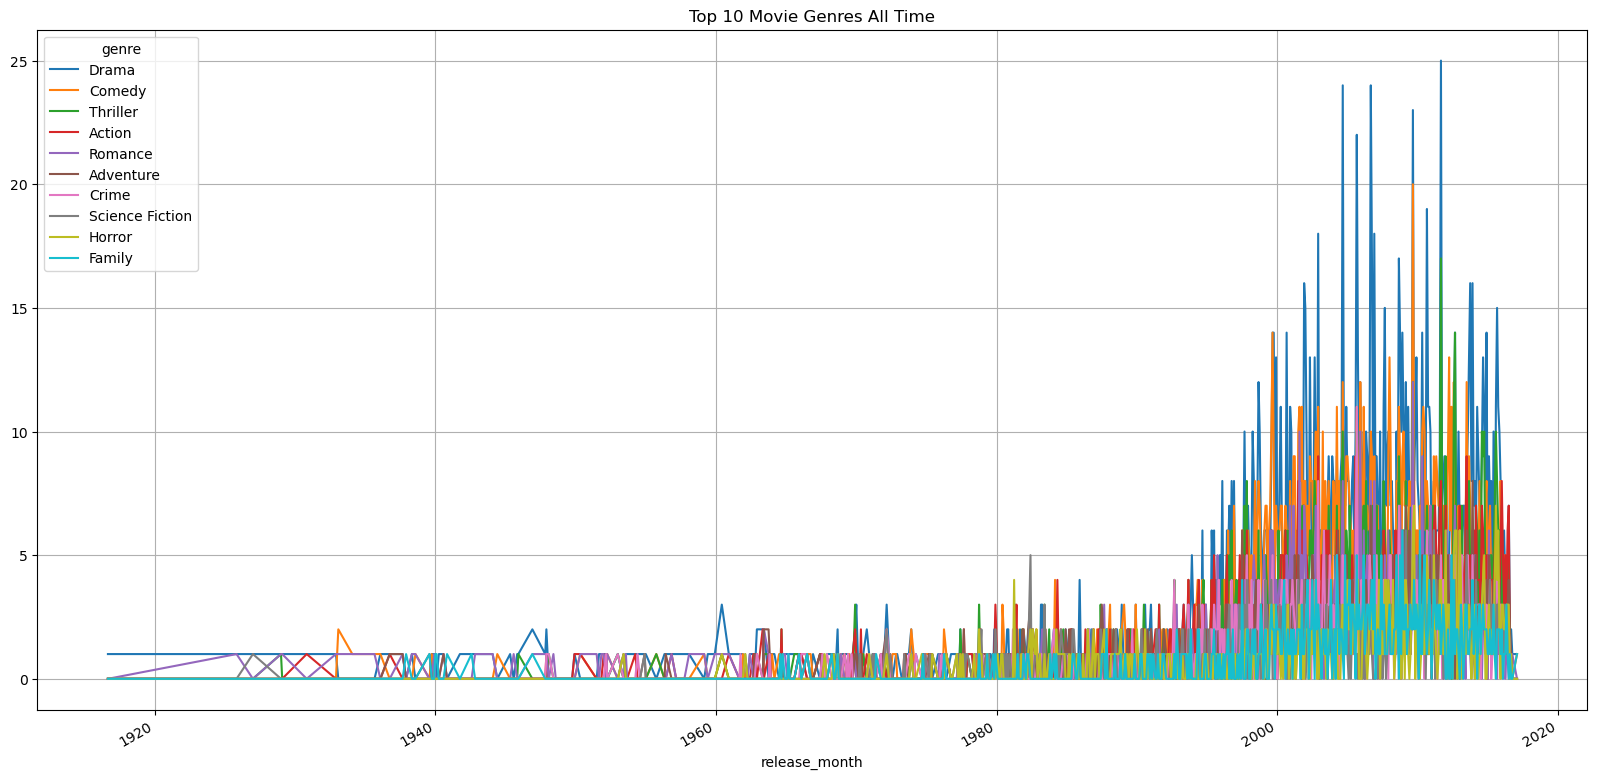

In [48]:
genre_date_matrix_df[top_10_genres].plot(grid=True, title='Top 10 Movie Genres All Time')

- Looking at the change in genre counts over time
- The genre tags prior to 1995 or so is too little, so I will zoom in on 2000 and after so we can see more clearly 

<Axes: title={'center': 'Top 10 Movie Genres Since 2000'}, xlabel='release_month'>

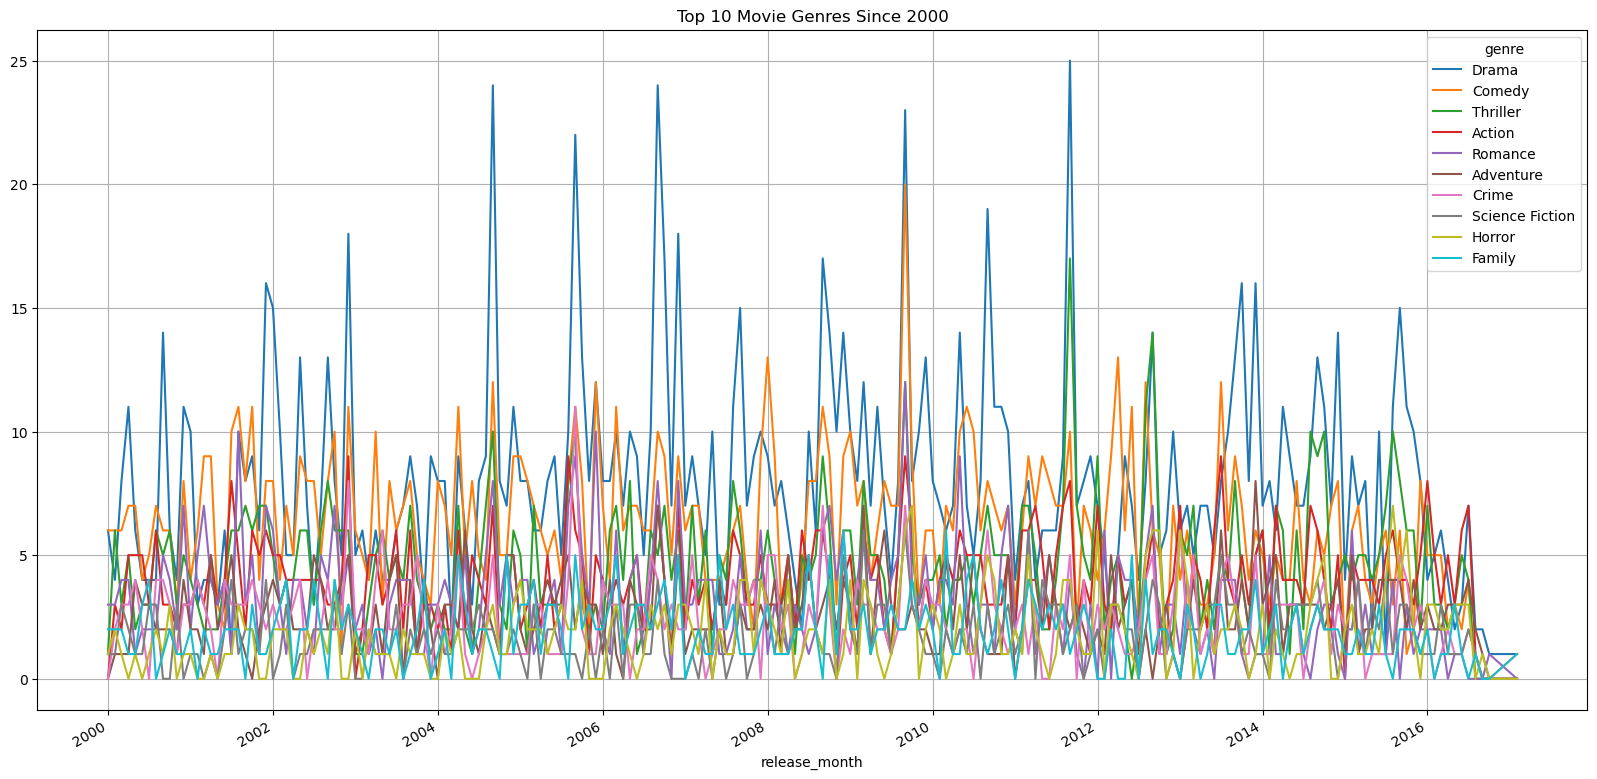

In [49]:
genre_date_matrix_df['2000-01-01':][top_10_genres].plot(grid=True, title='Top 10 Movie Genres Since 2000')

- The graph is still too busy to be able to tell much
- Also there are no notable trends for the genres, so it doesn't really tell a story either
- Let's try another approach, look at genre tag distributions for month number

In [50]:
#get month number from release_month
genre_overtime_df['month_number']=genre_overtime_df.release_month.apply(lambda x: x.month)
genre_overtime_df

,release_month,genre,count,month_number
0,1916-09-01,Drama,1,9
1,1925-11-01,Drama,1,11
2,1925-11-01,Romance,1,11
3,1925-11-01,War,1,11
4,1927-01-01,Drama,1,1
...,...,...,...,...
4824,2016-10-01,Drama,1,10
4825,2016-10-01,Romance,1,10
4826,2017-02-01,Comedy,1,2
4827,2017-02-01,Drama,1,2


In [51]:
genre_month_df=genre_overtime_df.groupby(['month_number','genre']).sum('count').reset_index()
genre_month_df

,month_number,genre,count
0,1,Action,72
1,1,Adventure,34
2,1,Animation,7
3,1,Comedy,122
4,1,Crime,56
...,...,...,...
228,12,Science Fiction,47
229,12,TV Movie,2
230,12,Thriller,94
231,12,War,31


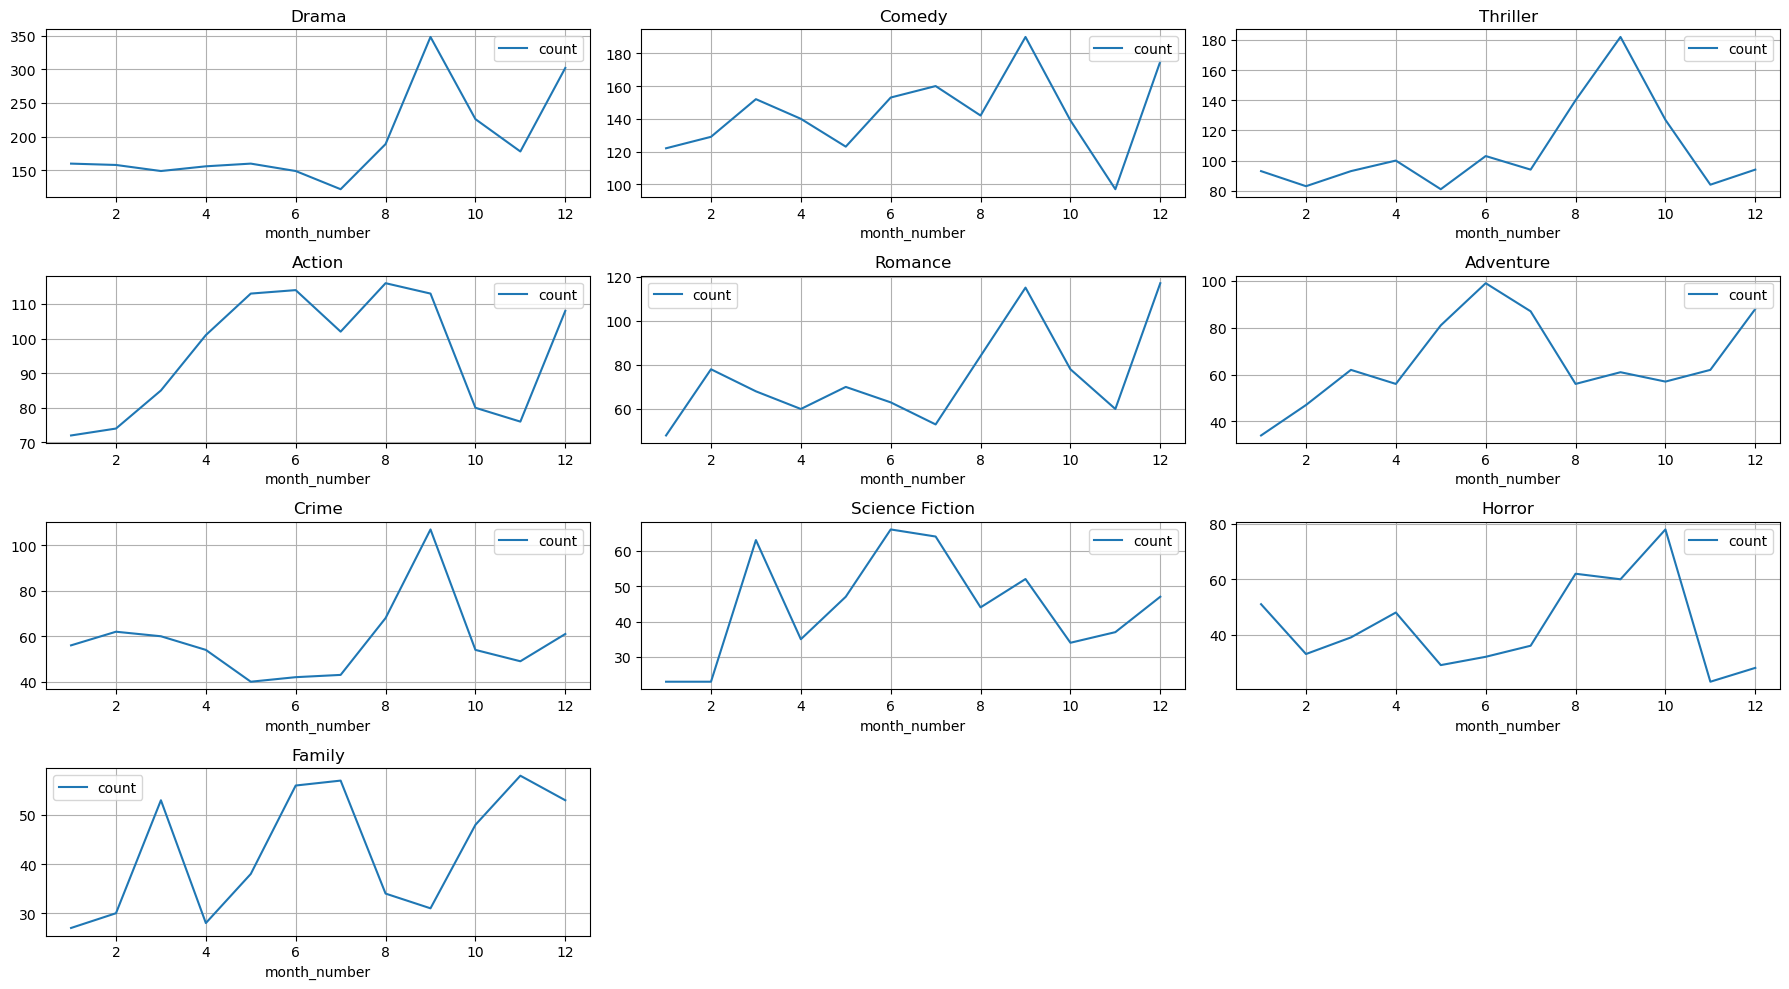

In [52]:
plt.figure(figsize=(18,10))
for n, genre in enumerate(top_10_genres):
    ax = plt.subplot(4, 3, n+1)
    genre_month_df[genre_month_df['genre']==genre].plot('month_number','count', title=genre, grid=True, ax=ax)
    plt.tight_layout()

- Looking at the top 10 genres' month distributions, we get a lot of insights
- September seems to be the biggest months for Drama, Comedy, Thriller, Romance and Crime
- Summer months June to July are big on Adventure, Sci Fi and Family
- January is slow across the board for all genres
- December sees a spike in all genres except for Horror, Thriller and Crime. Makes sense! We want to end the year on good vibes not scared vibes!!
- As expected, October is the biggest month for Horror